In [1]:
import pandas as pd 
import numpy as np 
jobs = pd.read_csv('jobs.csv',engine='python')
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
职位      500 non-null object
公司      500 non-null object
城市      500 non-null object
工资      497 non-null object
发布日期    500 non-null object
经验要求    499 non-null object
学历      499 non-null object
dtypes: object(7)
memory usage: 27.4+ KB


In [2]:
# 删除表中含有任何NaN的行
jobs = jobs.dropna(axis=0,how='any')
jobs['学历'].value_counts()

本科      282
大专      120
招1人      24
招若干人     21
招2人      19
硕士        9
招3人       8
中专        5
高中        3
招10人      2
招8人       1
招4人       1
招5人       1
Name: 学历, dtype: int64

In [3]:
jobs = jobs.drop(['发布日期'], axis=1)
jobs = jobs[jobs['学历'].isin(['本科','大专','硕士','中专','高中'])]
jobs.reset_index(drop=True,inplace=True)  #重新恢复索引
jobs.head()

,职位,公司,城市,工资,经验要求,学历
0,Python,长春理想科技信息有限公司,北京-朝阳区,0.8-1.3万/月,2年经验,本科
1,Python开发工程师,深圳市睿服科技有限公司,深圳-福田区,1-1.5万/月,3-4年经验,本科
2,Python初级开发工程师,华世界科技（深圳）有限公司,深圳-龙岗区,6-9千/月,1年经验,本科
3,Python开发工程师,上海井胜通讯技术有限公司,杭州,0.8-1万/月,3-4年经验,大专
4,Python开发工程师,深圳生理科技有限公司,深圳-南山区,1-1.5万/月,2年经验,本科


In [4]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 6 columns):
职位      419 non-null object
公司      419 non-null object
城市      419 non-null object
工资      419 non-null object
经验要求    419 non-null object
学历      419 non-null object
dtypes: object(6)
memory usage: 19.7+ KB


In [5]:
pay = jobs['工资']
pay = pay.str.split('-').apply(pd.Series)
pay[:3]

,0,1
0,0.8,1.3万/月
1,1,1.5万/月
2,6,9千/月


In [6]:
pay1 = pay[1].str.split('/').apply(pd.Series)
pay1[:3]

,0,1
0,1.3万,月
1,1.5万,月
2,9千,月


In [7]:
s1 = pay[pay1[1].isnull()][0]
s2 = s1.str.split('元/天').apply(pd.Series)[0]
s2 = np.array(s2)
s2.shape = 2, 1
s2.shape

(2, 1)

In [8]:
s1

72      184元/天
248    1500元/天
Name: 0, dtype: object

In [9]:
s2

array([['184'],
       ['1500']], dtype=object)

In [10]:
pay.loc[[72, 248], 1] = pay.loc[[72, 248], 0]
pay.loc[[72, 248]]

,0,1
72,184元/天,184元/天
248,1500元/天,1500元/天


In [11]:
pay.loc[[72, 248], 0] = s2[:, 0]
pay.loc[[72, 248]]

,0,1
72,184,184元/天
248,1500,1500元/天


In [12]:
pay1 = pay[1].str.split('/').apply(pd.Series)
pay1[1].value_counts()

月    406
年     11
天      2
Name: 1, dtype: int64

In [13]:
pay1[0][0]

'1.3万'

In [14]:
mystr = pay1[0][0]
mystr

'1.3万'

In [15]:
alpha = list(filter(str.isalpha, mystr))
alpha

['万']

In [16]:
pay1[2] = pay1[1]
pay1[:3]

,0,1,2
0,1.3万,月,月
1,1.5万,月,月
2,9千,月,月


In [17]:
len(pay1)

419

In [18]:
pay1.iloc[1, 0]

'1.5万'

In [19]:
cnt = 0
for i in pay1[0]:
    alpha = list(filter(str.isalpha, i))
    num = i.split(''.join(alpha))
#     print(num[0])
#     print(''.join(alpha))
    pay1.iloc[cnt, 0] = num[0]
    pay1.iloc[cnt, 1] = ''.join(alpha)
    cnt += 1

In [20]:
pay1[:3]

,0,1,2
0,1.3,万,月
1,1.5,万,月
2,9,千,月


In [21]:
pay[1] = pay1[0]
pay[2] = pay1[1]
pay[3] = pay1[2]

In [22]:
pay[:3]

,0,1,2,3
0,0.8,1.3,万,月
1,1,1.5,万,月
2,6,9,千,月


In [23]:
pay[pay[2]=='元']

,0,1,2,3
72,184,184,元,天
248,1500,1500,元,天


In [24]:
pay[[0, 1]] = pay[[0, 1]].astype("float")
pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 4 columns):
0    419 non-null float64
1    419 non-null float64
2    419 non-null object
3    419 non-null object
dtypes: float64(2), object(2)
memory usage: 13.2+ KB


In [25]:
pay.loc[[72, 248]]

,0,1,2,3
72,184.0,184.0,元,天
248,1500.0,1500.0,元,天


In [26]:
pay.loc[pay[2] == '元',[0, 1]] = pay.loc[pay[2] == '元',[0, 1]] * 30 / 1000
pay[pay[2] == '元']

,0,1,2,3
72,5.52,5.52,元,天
248,45.00,45.00,元,天


In [27]:
pay[pay[3] == '年'][:3]

,0,1,2,3
31,30.0,55.0,万,年
58,30.0,50.0,万,年
81,30.0,60.0,万,年


In [28]:
pay[pay[2] == '万'][:3]

,0,1,2,3
0,0.8,1.3,万,月
1,1.0,1.5,万,月
3,0.8,1.0,万,月


In [29]:
pay.loc[(pay[2] == '万') & (pay[3] == '月')][:3]

,0,1,2,3
0,0.8,1.3,万,月
1,1.0,1.5,万,月
3,0.8,1.0,万,月


In [30]:
pay.loc[(pay[2] == '万') & (pay[3] == '月'),[0, 1]] = pay.loc[pay[2] == '万',[0, 1]] * 10 
pay.loc[(pay[2] == '万') & (pay[3] == '年'),[0, 1]] = pay.loc[pay[2] == '万',[0, 1]] * 10 / 12
pay[pay[2] == '万'][:3]

,0,1,2,3
0,8.0,13.0,万,月
1,10.0,15.0,万,月
3,8.0,10.0,万,月


In [31]:
pay.loc[pay[2] == '元',[2, 3]] = '千', '月'
pay.loc[pay[2] == '万',[2, 3]] = '千', '月'

In [32]:
pay.loc[[72, 248]]

,0,1,2,3
72,5.52,5.52,千,月
248,45.00,45.00,千,月


In [33]:
print(pay[2].value_counts())
print(pay[3].value_counts())

千    419
Name: 2, dtype: int64
月    419
Name: 3, dtype: int64


In [34]:
pay["千/月"] = pay[[0, 1]].apply(lambda x: (x[0] + x[1]) / 2, axis=1)
pay[:3]

,0,1,2,3,千/月
0,8.0,13.0,千,月,10.5
1,10.0,15.0,千,月,12.5
2,6.0,9.0,千,月,7.5


In [35]:
jobs[:3]

,职位,公司,城市,工资,经验要求,学历
0,Python,长春理想科技信息有限公司,北京-朝阳区,0.8-1.3万/月,2年经验,本科
1,Python开发工程师,深圳市睿服科技有限公司,深圳-福田区,1-1.5万/月,3-4年经验,本科
2,Python初级开发工程师,华世界科技（深圳）有限公司,深圳-龙岗区,6-9千/月,1年经验,本科


In [36]:
jobs["最低"] = pay[0]
jobs["最高"] = pay[1]
jobs["千/月"] = pay["千/月"]
jobs[:3]

,职位,公司,城市,工资,经验要求,学历,最低,最高,千/月
0,Python,长春理想科技信息有限公司,北京-朝阳区,0.8-1.3万/月,2年经验,本科,8.0,13.0,10.5
1,Python开发工程师,深圳市睿服科技有限公司,深圳-福田区,1-1.5万/月,3-4年经验,本科,10.0,15.0,12.5
2,Python初级开发工程师,华世界科技（深圳）有限公司,深圳-龙岗区,6-9千/月,1年经验,本科,6.0,9.0,7.5


In [37]:
jobs["经验要求"].value_counts()

3-4年经验    145
2年经验      112
无工作经验      77
1年经验       59
5-7年经验     26
Name: 经验要求, dtype: int64

In [38]:
exp = jobs['经验要求']
exp = exp.replace('无工作经验', '0年经验')
exp = exp.str.split('年经验').apply(pd.Series)[0]
exp.value_counts()

3-4    145
2      112
0       77
1       59
5-7     26
Name: 0, dtype: int64

In [39]:
exp = exp.str.split('-').apply(pd.Series)
exp = exp.fillna(0)

In [40]:
exp = exp.astype("float")
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 2 columns):
0    419 non-null float64
1    419 non-null float64
dtypes: float64(2)
memory usage: 6.6 KB


In [41]:
exp[2] = exp[[0, 1]].apply(lambda x: (x[0] + x[1]) / 2, axis=1)
exp[:3]

,0,1,2
0,2.0,0.0,1.0
1,3.0,4.0,3.5
2,1.0,0.0,0.5


In [42]:
jobs["经验/年"] = exp[2]
jobs[:3]

,职位,公司,城市,工资,经验要求,学历,最低,最高,千/月,经验/年
0,Python,长春理想科技信息有限公司,北京-朝阳区,0.8-1.3万/月,2年经验,本科,8.0,13.0,10.5,1.0
1,Python开发工程师,深圳市睿服科技有限公司,深圳-福田区,1-1.5万/月,3-4年经验,本科,10.0,15.0,12.5,3.5
2,Python初级开发工程师,华世界科技（深圳）有限公司,深圳-龙岗区,6-9千/月,1年经验,本科,6.0,9.0,7.5,0.5


In [43]:
jobs["城市"].value_counts().head()

深圳-南山区     28
上海-浦东新区    25
上海         21
北京-海淀区     17
广州         17
Name: 城市, dtype: int64

In [44]:
city = jobs["城市"]
city = city.str.split('-').apply(pd.Series)[0]

In [45]:
dic = []
cnt = 0
for key,value in city.value_counts().items():
#     print(key, value)
    if value < 5:
        dic.append(key)
dic[:3]

['苏州', '福州', '昆明']

In [46]:
city[:3]

0    北京
1    深圳
2    深圳
Name: 0, dtype: object

In [47]:
city.loc[city.str.contains(dic[0])]

65     苏州
179    苏州
190    苏州
316    苏州
Name: 0, dtype: object

In [48]:
city.loc[city.str.contains(dic[0])] = '其他'
city.loc[city=='其他']

65     其他
179    其他
190    其他
316    其他
Name: 0, dtype: object

In [49]:
for i in range(len(dic)):
    city.loc[city.str.contains(dic[i])] = '其他'
city.value_counts()

上海      89
深圳      61
其他      43
广州      42
北京      40
武汉      30
杭州      25
南京      17
西安      14
成都      14
重庆       9
郑州       7
长沙       6
异地招聘     6
合肥       6
青岛       5
大连       5
Name: 0, dtype: int64

In [50]:
jobs["城市"] = city
jobs[:3]

,职位,公司,城市,工资,经验要求,学历,最低,最高,千/月,经验/年
0,Python,长春理想科技信息有限公司,北京,0.8-1.3万/月,2年经验,本科,8.0,13.0,10.5,1.0
1,Python开发工程师,深圳市睿服科技有限公司,深圳,1-1.5万/月,3-4年经验,本科,10.0,15.0,12.5,3.5
2,Python初级开发工程师,华世界科技（深圳）有限公司,深圳,6-9千/月,1年经验,本科,6.0,9.0,7.5,0.5


In [51]:
jobs = jobs.drop(['工资', '经验要求'], axis=1)
jobs[:3]

,职位,公司,城市,学历,最低,最高,千/月,经验/年
0,Python,长春理想科技信息有限公司,北京,本科,8.0,13.0,10.5,1.0
1,Python开发工程师,深圳市睿服科技有限公司,深圳,本科,10.0,15.0,12.5,3.5
2,Python初级开发工程师,华世界科技（深圳）有限公司,深圳,本科,6.0,9.0,7.5,0.5


In [52]:
jobs["职位"].value_counts().head()

Python开发工程师      124
Python高级开发工程师     27
Python工程师         11
python开发工程师       10
python开发           5
Name: 职位, dtype: int64

In [53]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(jobs["城市"])
jobs['城市'] = le.transform(jobs["城市"])
jobs['城市'][:8]

0     2
1    11
2    11
3     9
4    11
5    14
6    10
7     2
Name: 城市, dtype: int64

In [54]:
le = preprocessing.LabelEncoder()
le.fit(jobs["学历"])
jobs['学历'] = le.transform(jobs["学历"])
jobs['学历'].value_counts()

2    282
1    120
3      9
0      5
4      3
Name: 学历, dtype: int64

In [55]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 8 columns):
职位      419 non-null object
公司      419 non-null object
城市      419 non-null int64
学历      419 non-null int64
最低      419 non-null float64
最高      419 non-null float64
千/月     419 non-null float64
经验/年    419 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 26.3+ KB


In [56]:
jobs['经验/年'] = jobs['经验/年'].astype("float")

In [57]:
X = jobs.drop(['职位', '公司', '经验/年'], axis=1)
y = jobs['千/月']

In [58]:
from sklearn import preprocessing
X = preprocessing.scale(X)
y = preprocessing.scale(y)

In [59]:
print(X.shape)
print(y.shape)

(419, 5)
(419,)


In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [62]:
criterion = ['mse']
min_samples_leaf = [1, 2, 3]
min_samples_split = [2, 3, 4]
scores = ['precision', 'recall', 'accuracy', 'f1']

In [64]:
from sklearn.model_selection import GridSearchCV
# 用GridSearchCV寻找最优参数（字典）
param = {'criterion':criterion, 'min_samples_leaf':min_samples_leaf, 'min_samples_split':min_samples_split}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid=param, cv=6)
grid.fit(X_train, y_train)
print('最佳度量值:',grid.best_score_)  # 获取最佳度量值
print('最佳参数：',grid.best_params_)  # 获取最佳度量值时的代定参数的值。是一个字典
print('最佳模型：',grid.best_estimator_)  # 获取最佳度量时的分类器模型

最佳度量值: 0.9922817032458116
最佳参数： {'criterion': 'mse', 'min_samples_leaf': 2, 'min_samples_split': 2}
最佳模型： DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


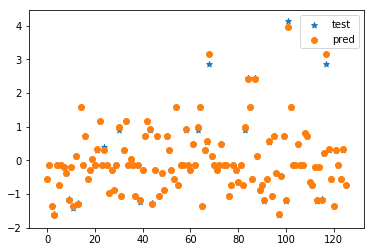

In [65]:
# 画图展示训练结果,分别为测试值和预测值
y_pred = grid.predict(X_test)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(list(range(len(X_test))),y_test,marker='*')
ax.scatter(list(range(len(X_test))),y_pred,marker='o')  # 不管是画散点图还是折现图，都会被挡住
plt.legend(labels=['test', 'pred'])
plt.show()